## Assignment 2: Time Series Forecasting

### Lijie Su a1873581

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# read dataset from csv file
data = pd.read_csv('energydata_complete.csv')
# load the dataset
data_target = pd.read_csv('energydata_complete.csv', usecols=[1], engine='python')

# set standard color variable
color = "#1f77b4"

# display first few lines to make sure correctly import
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Variables Description：

T1: Temperature in kitchen area, in Celsius

T2: Temperature in living room area, in Celsius

T3: Temperature in laundry room area, in Celsius

T4: Temperature in office room, in Celsius

T5: Temperature in bathroom, in Celsius

T6: Temperature outside the building (north side), in Celsius

T7: Temperature in ironing room , in Celsius

T8: Temperature in teenager room 2, in Celsius

T9: Temperature in parents room, in Celsius

RHI: Humidity in kitchen area, in %

RH2: Humidity in living room area, in %

RH3: Humidity in laundry room area, in %

RH4: Humidity in office room, in %

RH5: Humidity in bathroom, in %

RH6: Humidity outside the building (north side), in %

RH7: Humidity in ironing room, in %

RH8: Humidity in teenager room 2,in %

RH9: Humidity in parents room, in %

To: Temperature outside (from Chievres weather station), in Celsius

Pressure: (from Chievres weather station), in mm Hg

Hg RHout: Humidity outside (from Chievres weather station), in %

Wind speed: (from Chievres weather station), in m/s

Visibility: (from Chievres weather station), in km

Tdewpoint: (from Chievres weather station), A*C

Appliances, energy use in Wh: Dependent variable

### 2. Analyse and visualise the data

#### 2.1 Check data's basic information

In [48]:
# Check data scale
data.shape

(19735, 29)

In [49]:
# Check data types
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

#### 2.2 Handle missing values

In [50]:
# Check for missing values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

From the abundance of 0s observed in the dataset, it's evident that there are no missing values present. Consequently, there's no need for further handling of missing values.

In [51]:
# Check if we have any duplicated data
any(data.duplicated())

False

In [52]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

The presence of 'False' indicates the non-existence of duplicate data.

#### 2.3 Exploratory Data Analysis (EDA)

- Add Features

Since the target variable in the dataset is the electricity consumption of household appliances ('Appliances'), it may be influenced by other features such as temperature. However, intuitively, electricity consumption is directly linked to time. For example, electricity usage in the evening is expected to be higher than during the day because lights are commonly used, and there may be more household activities like watching TV. Conversely, from midnight to early morning, the target variable should be at its lowest as most people are asleep, resulting in minimal electricity usage.

Therefore, to better observe the distribution of the target variable over time, we have introduced the following variables.

In [53]:
# copy dataset for time-based analysis
new_data = data.copy()
new_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [54]:
#converting date into datetime
new_data['date'] = new_data['date'].astype('datetime64[ns]')
new_data['Date'] = pd.to_datetime(new_data['date']).dt.date
new_data['Time'] = pd.to_datetime(new_data['date']).dt.time
new_data['hour'] = new_data['date'].dt.hour
new_data['month'] = new_data['date'].dt.month
new_data['day_of_week'] = new_data['date'].dt.dayofweek

new_data= new_data.drop(["date"], axis=1)
new_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time,hour,month,day_of_week
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,17,1,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,17,1,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,17,1,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,17,1,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,17,5,4
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,17,5,4
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,17,5,4
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,17,5,4


- Hourly distribution of target variable

In [55]:
# Calculate the total energy consumed by the appliance per hour
app_hour = new_data.groupby(by='hour',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_hour.sort_values(by='Appliances',ascending=False)

,hour,Appliances
18,18,156670
17,17,133600
19,19,117600
11,11,109430
20,20,104380
10,10,103060
13,13,102540
12,12,101630
16,16,98560
9,9,92710


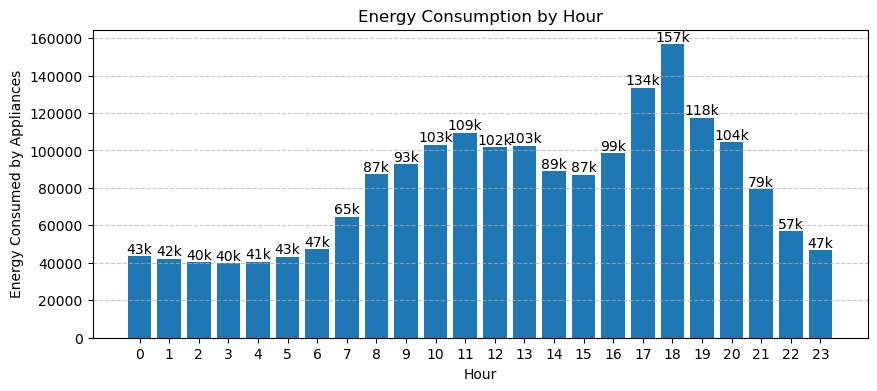

In [56]:
# Function to format the numerical value to 'k' format
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_hour['hour'], app_hour['Appliances'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Hour')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by Hour')  # Set the title
plt.xticks(app_hour['hour'])  # Set the x-axis ticks to match the hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot


The graph above confirms our hypothesis: electricity consumption is highest between 17:00 and 20:00, and lowest between 23:00 and 06:00 the following day. This also serves as evidence of the reliability of the data.

- Weekday distribution of target variable

In [57]:
# Calculate the total energy consumed by the appliance per hour
app_week_day = new_data.groupby(by='day_of_week',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_week_day.sort_values(by='Appliances',ascending=False)

,day_of_week,Appliances
0,0,309610
4,4,297650
5,5,290690
3,3,260450
6,6,259690
2,2,259000
1,1,250920


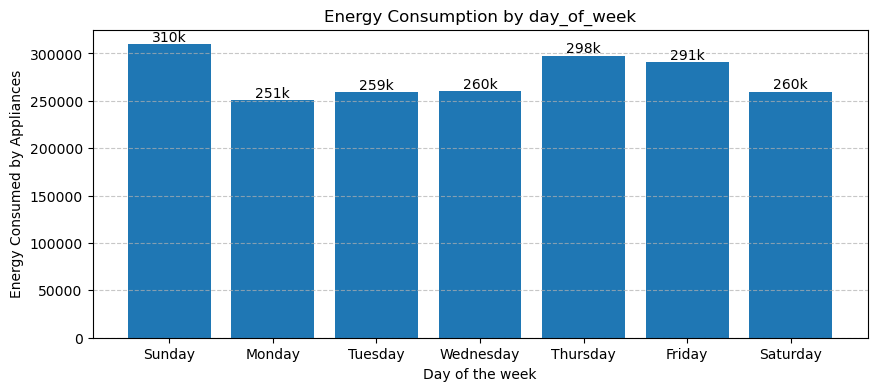

In [58]:
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['day_of_week'], app_week_day['Appliances'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Day of the week')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by day_of_week')  # Set the title
plt.xticks(list(day_names.keys()), list(day_names.values())) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot


When split by the day of the week, the distribution of the target variable does not exhibit significant features. The only noteworthy point is that the electricity consumption on Sundays is significantly higher than on other days, approximately 10%.

- General view of the whole dataset

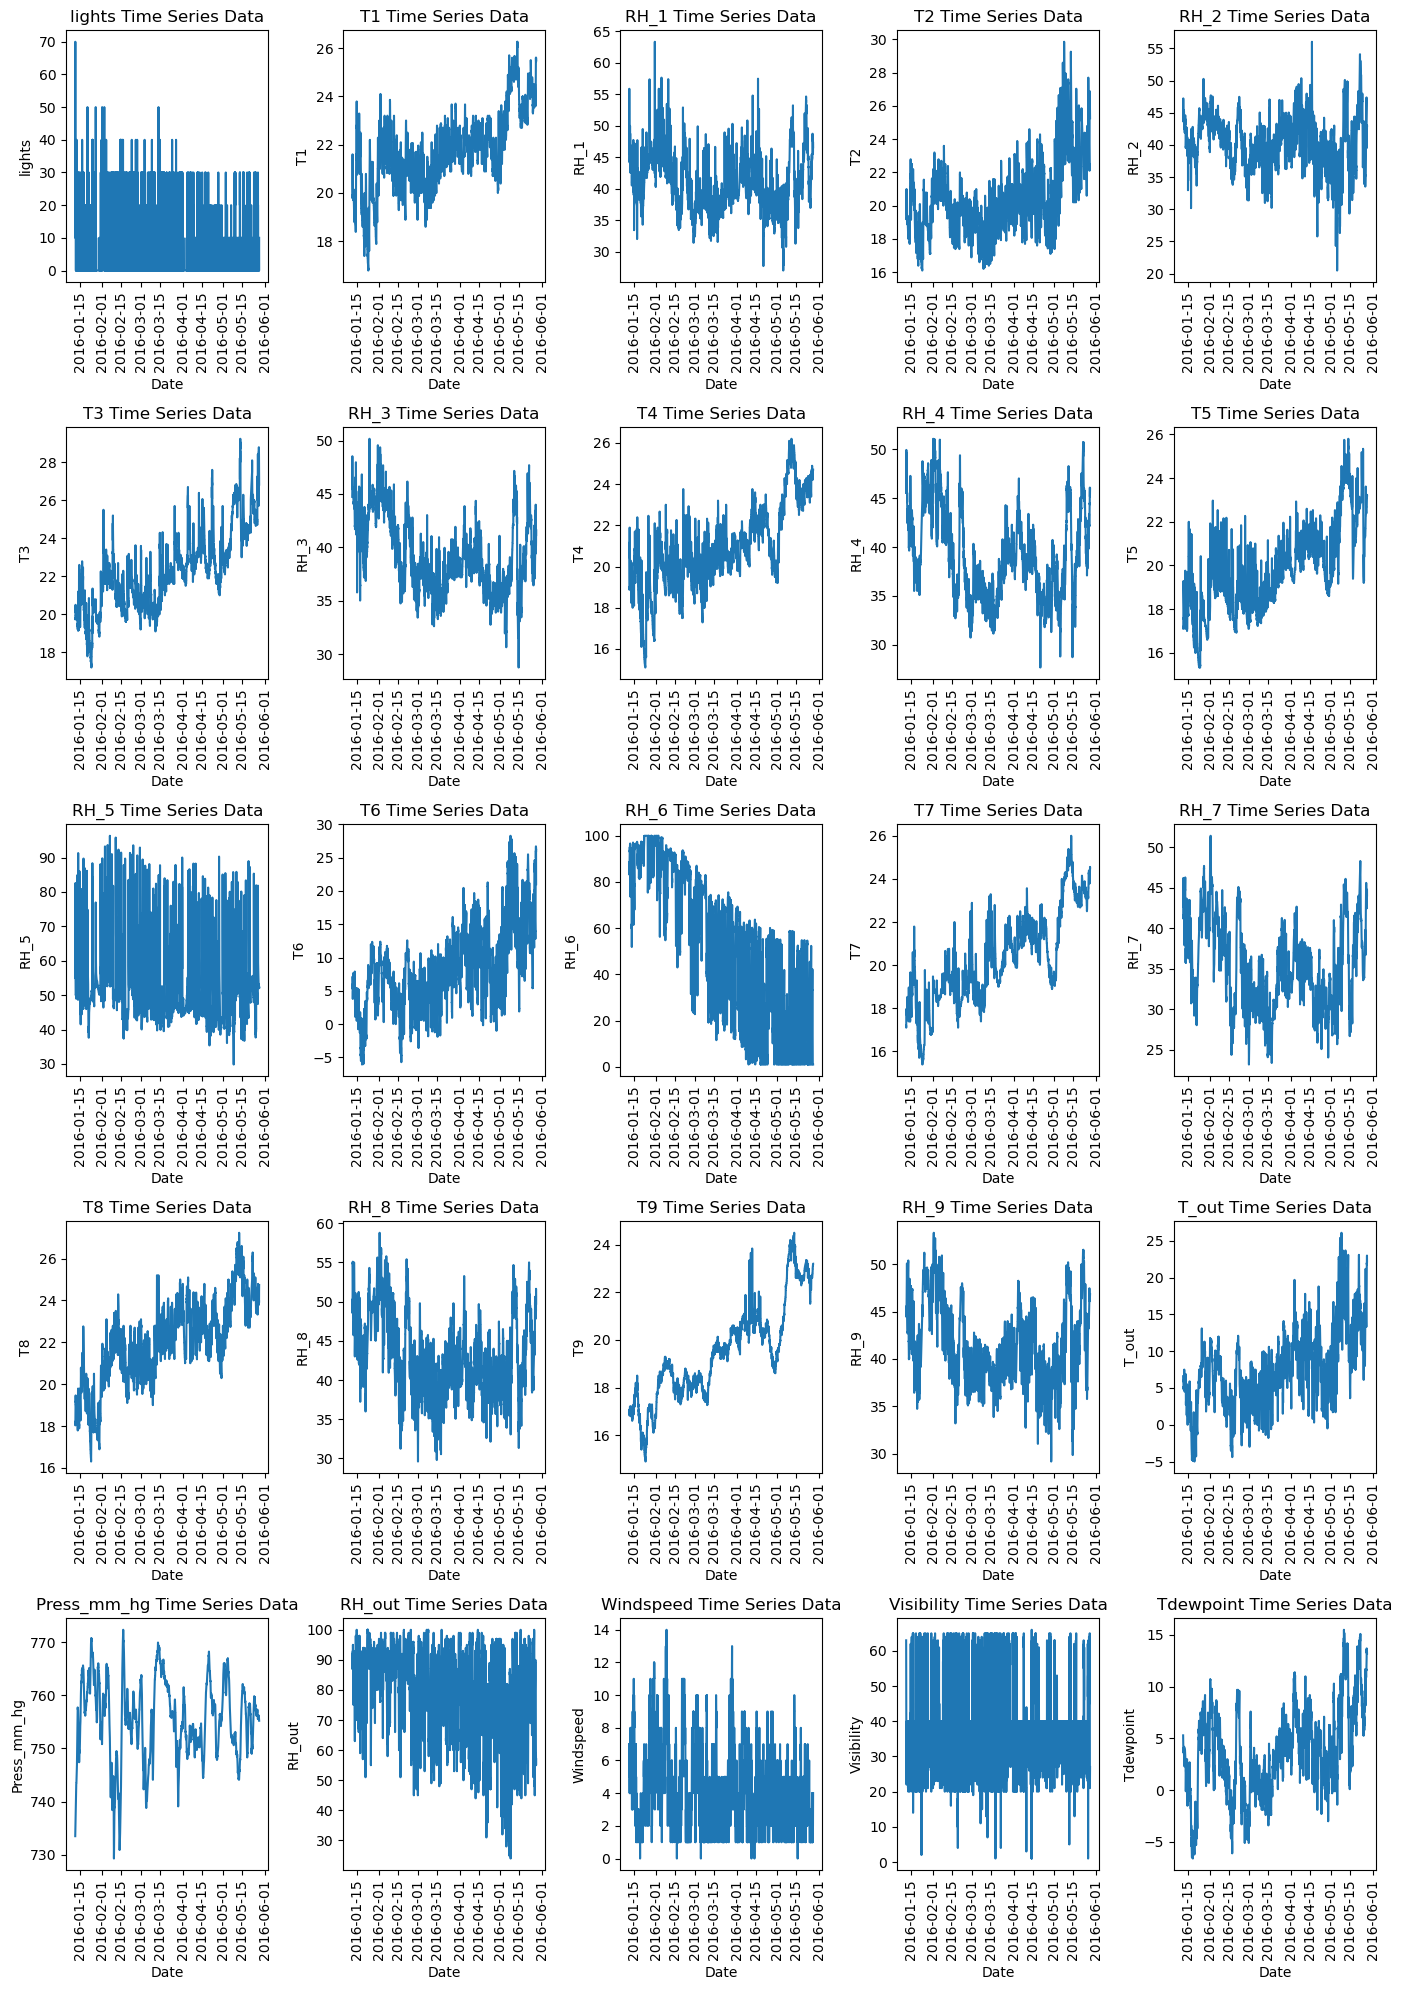

In [59]:
# Filter columns excluding 'rv1' and 'rv2'
selected_columns = [col for col in data.columns[2:] if col not in ['rv1', 'rv2']]

# Determine the number of rows needed for the subplots
num_cols = len(selected_columns)
num_rows = (num_cols - 1) // 5 + 1

# Create subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(14, num_rows*4))

# Loop through selected columns and plot time series on subplots
for i in range(num_rows):
    for j in range(5):
        index = i * 5 + j
        if index < num_cols:
            var = selected_columns[index]
            sns.lineplot(y=data[var], x=data['date'], ax=axs[i,j], linewidth=1.5)
            axs[i,j].set_xlabel('Date')
            axs[i,j].set_ylabel(var)
            axs[i,j].set_title('{} Time Series Data'.format(var))
            axs[i,j].tick_params(axis='x', rotation=90)
        else:
            axs[i,j].axis('off')

plt.tight_layout()
plt.show()


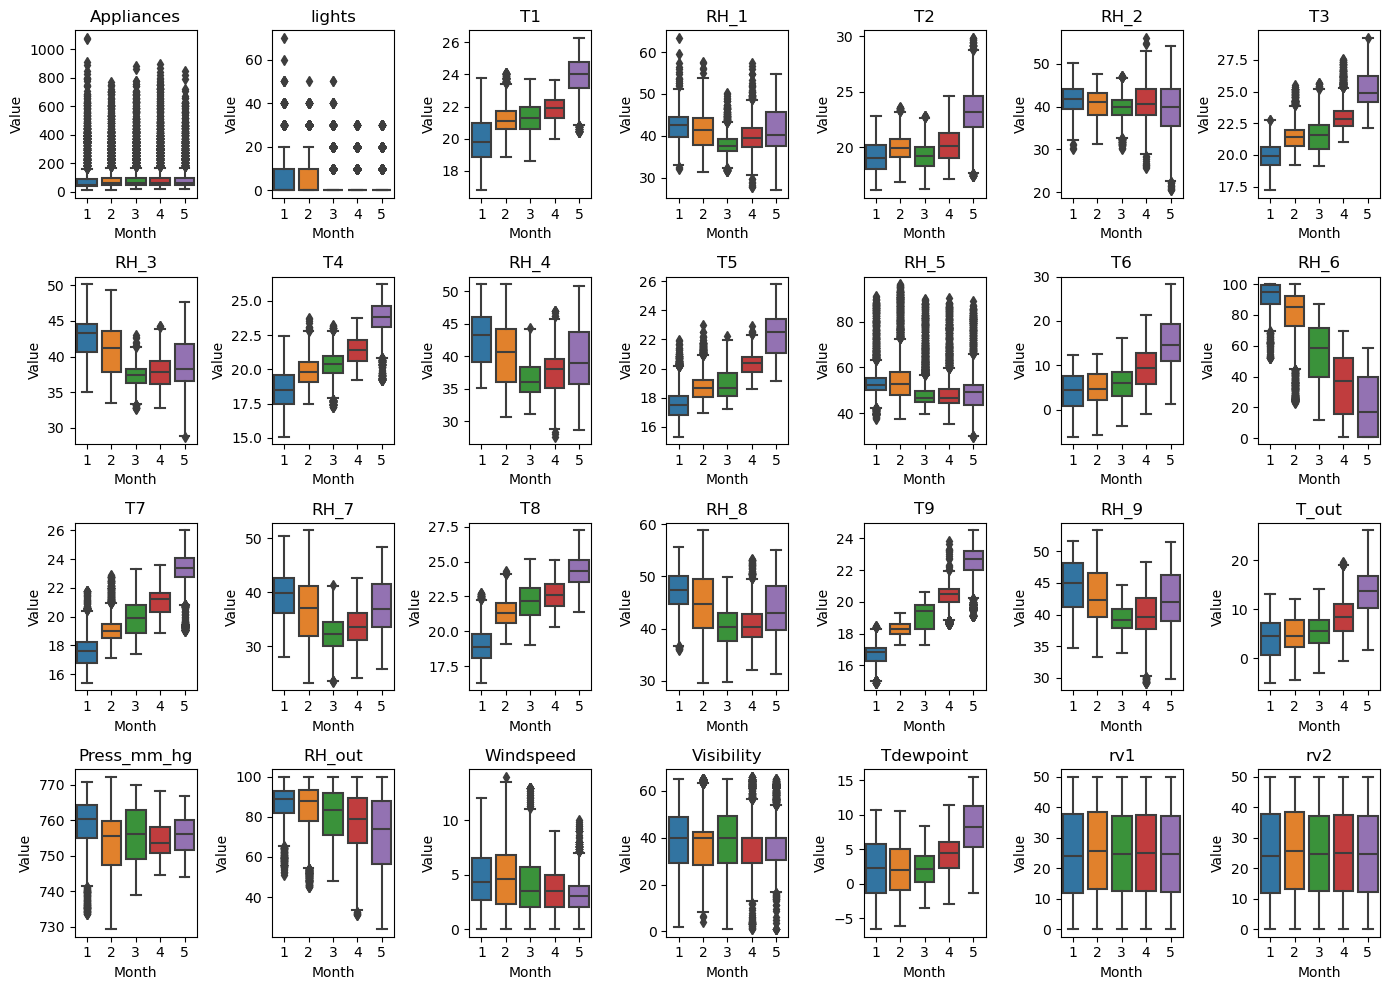

In [60]:
# Extracting numerical columns from the data
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 
             'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

# Create subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical):
    ax = axs[i]
    sns.boxplot(x=data['date'].dt.month, y=data[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

For temperature (T), there is an overall increasing trend in the data. This is in line with common sense, as the seasons transition from winter to spring in the Northern Hemisphere. Other data show no significant features.







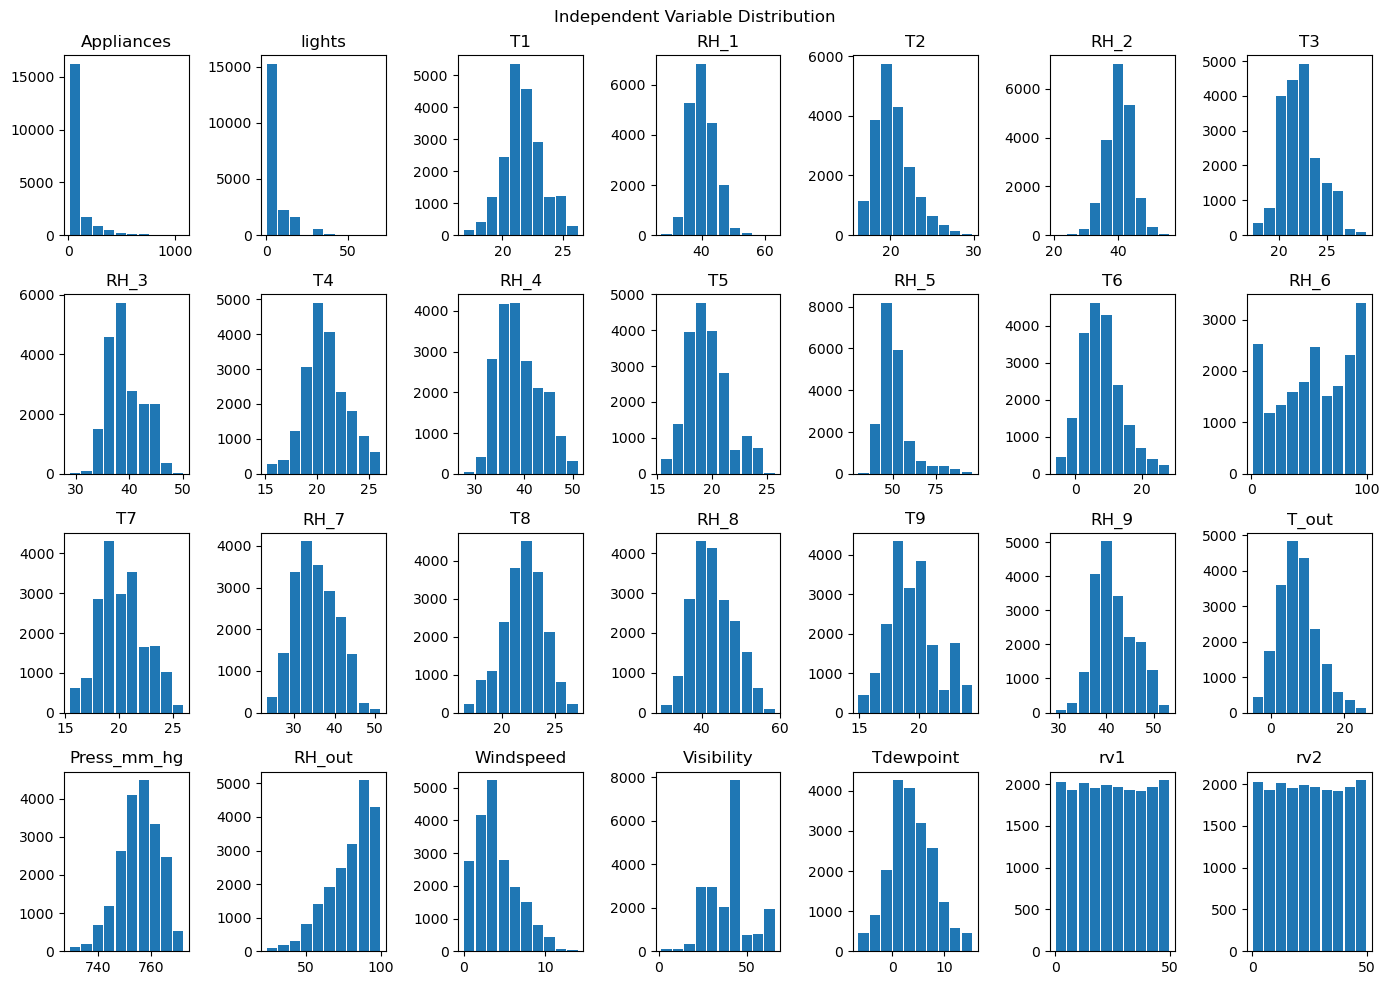

In [61]:
# Creating subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Counter for accessing columns
cpt = 0

# Looping through subplots and plotting histograms for each numerical column
for i in range(4):
    for j in range(7):
        var = numerical[cpt]
        axs[i,j].hist(data[var].values, rwidth=0.9)
        axs[i,j].set_title(var)
        cpt += 1
        
fig.suptitle('Independent Variable Distribution')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


We can observe the shape of the distribution for each feature. For example, features like temperature and humidity may show a normal distribution, while others might be skewed or have multiple peaks.

- A closer look at Appliances

Appliances is our key study object, so we want a closer look at it.

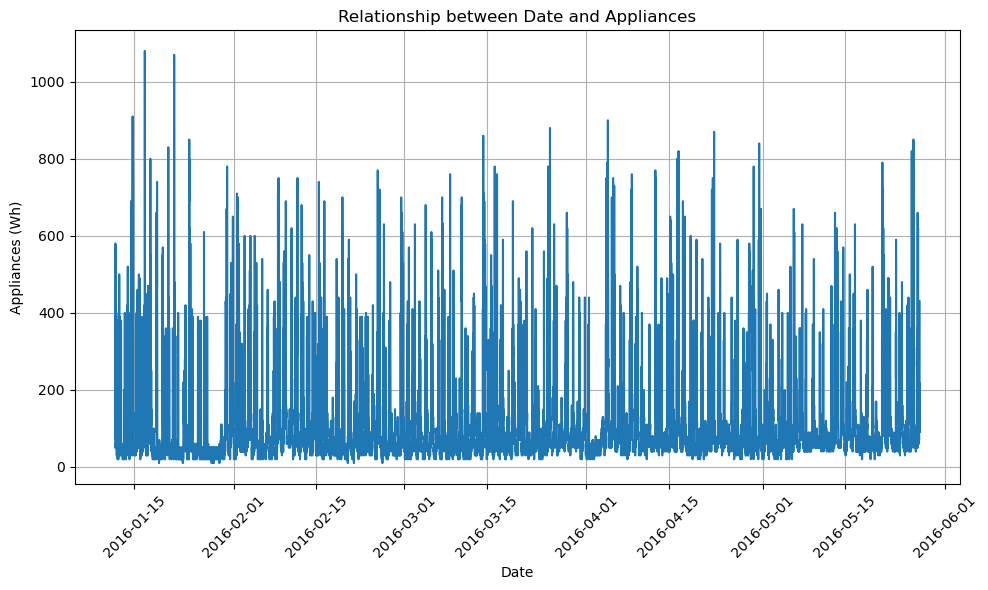

In [62]:
# Plot the relationship between 'date' and 'Appliances'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['date'], data['Appliances'], color='#1f77b4',  linestyle='-')  # Plot with markers
plt.title('Relationship between Date and Appliances')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From above we can see that there is no visually strong pattern between electricity comsumption -- 'Appliances', and date. However, this absence of a conspicuous pattern doesn't necessarily imply that the data lacks underlying structure. On the contrary, it underscores the importance of our task to uncover and understand the latent patterns hidden within the data.

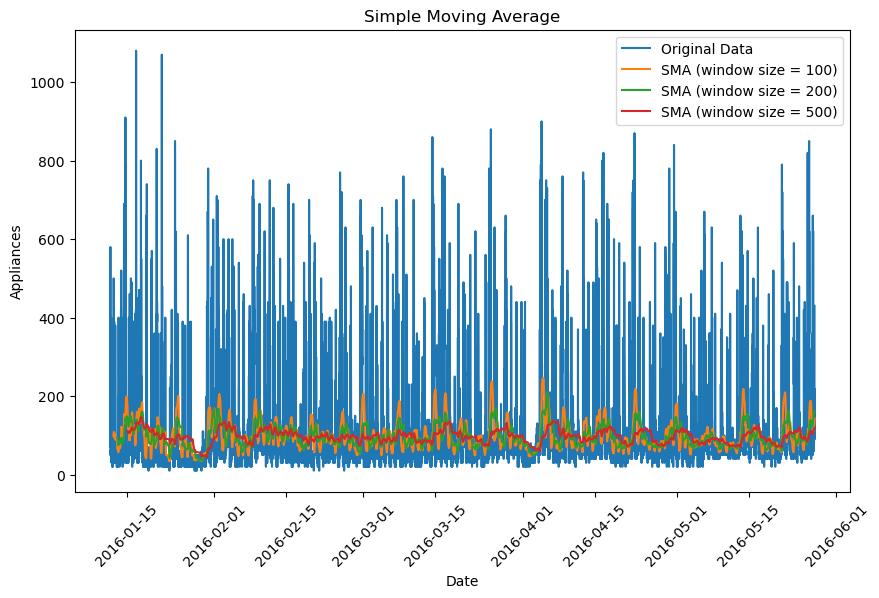

In [63]:
# Calculate SMA
window_size_1 = 100
window_size_2 = 200
window_size_3 = 500
sma_1 = data['Appliances'].rolling(window=window_size_1).mean()
sma_2 = data['Appliances'].rolling(window=window_size_2).mean()
sma_3 = data['Appliances'].rolling(window=window_size_3).mean()

# Draw the plt
plt.figure(figsize=(10, 6))  
plt.plot(data['date'], data['Appliances'], label='Original Data')
plt.plot(data['date'], sma_1, label='SMA (window size = {})'.format(window_size_1))
plt.plot(data['date'], sma_2, label='SMA (window size = {})'.format(window_size_2))
plt.plot(data['date'], sma_3, label='SMA (window size = {})'.format(window_size_3))
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Simple Moving Average')
plt.legend()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


After applying the Simple Moving Average (SMA) model with window sizes of 100, 200, and 500, and closely observing the resulting graphs, no significant trends were discernible. This suggests that the 'Appliances' value remains relatively stable (stationary) throughout the duration of the data capture.

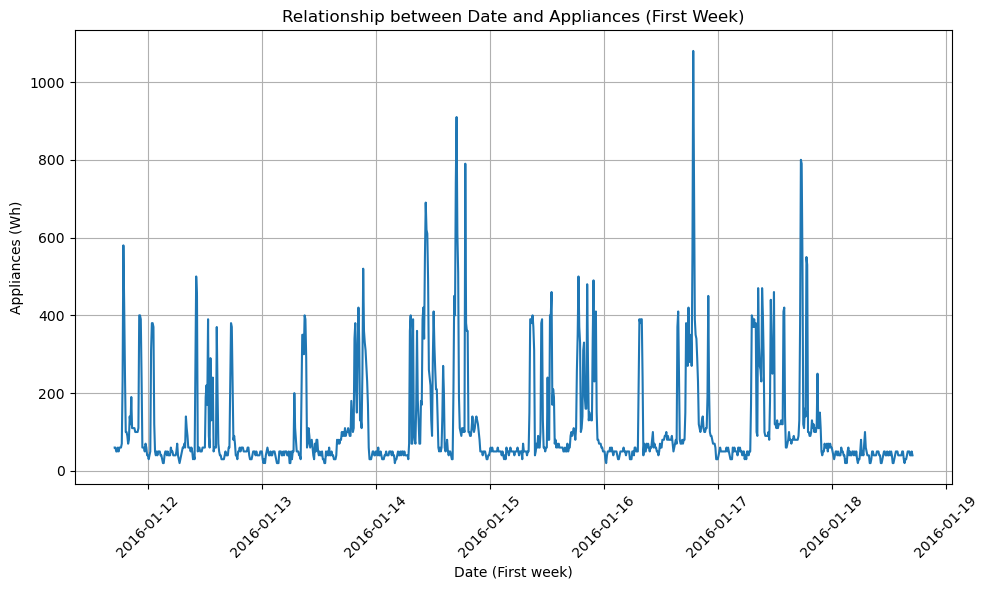

In [64]:
# Filtering the data for the first week
first_week_data = data[(data['date'] >= '2016-01-11 17:00:00') & (data['date'] <= '2016-01-18 17:00:00')]

# Plotting the relationship between 'date' and 'Appliances' for the first week
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.plot(first_week_data['date'], first_week_data['Appliances'], color='#1f77b4', linestyle='-')  # Plotting the data
plt.title('Relationship between Date and Appliances (First Week)')  # Adding title
plt.xlabel('Date (First week)')  # Adding x-axis label
plt.ylabel('Appliances (Wh)')  # Adding y-axis label
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)  # Adding gridlines
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot

But we can see a clear daily pattern here in the 1-week-long obeservation. This aligns with our Hourly Oberservation previously.

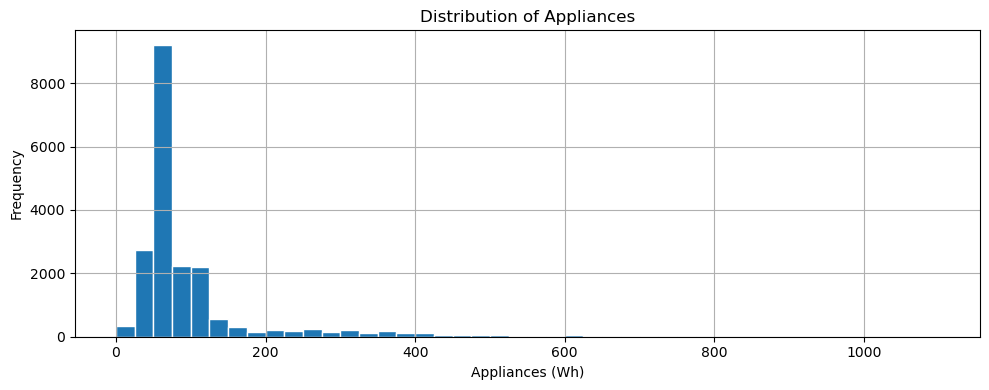

In [65]:
# Plotting the histogram for the "Appliances" column
plt.figure(figsize=(10, 4))  # Setting the figure size
bin_width = 25  # Define the bin width
max_value = int(max(data['Appliances']))
bins = range(0, max_value + bin_width, bin_width)  # Define the bins with a gap of 50 units starting from 0
plt.hist(data['Appliances'], bins=bins, color='#1f77b4', edgecolor='white')  # Plotting histogram with specified bins
plt.title('Distribution of Appliances')  # Adding title
plt.xlabel('Appliances (Wh)')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding gridlines
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot


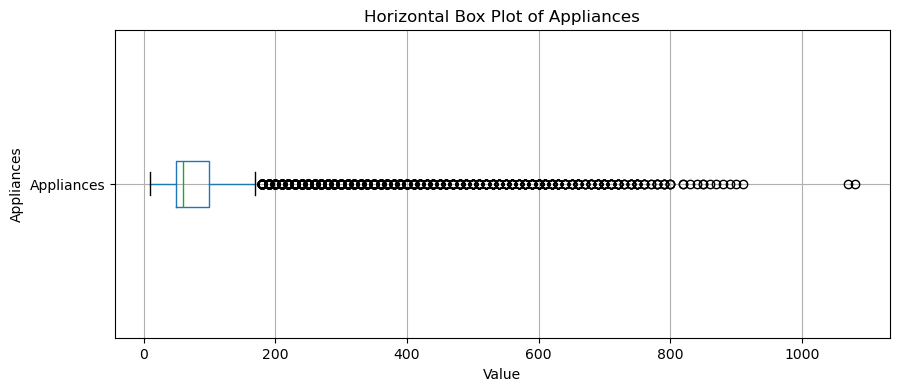

In [66]:
data.boxplot(column='Appliances', vert=False, figsize=(10, 4))

# Add title and labels
plt.title('Horizontal Box Plot of Appliances')
plt.xlabel('Value')
plt.ylabel('Appliances')

# Show the plot
plt.show()

The box plot has a long right-hand side tail, it indicates that it is positively skewed with some high energy use.

- Correlation analysis

Summary Statistics for Numerical Variables:
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std    

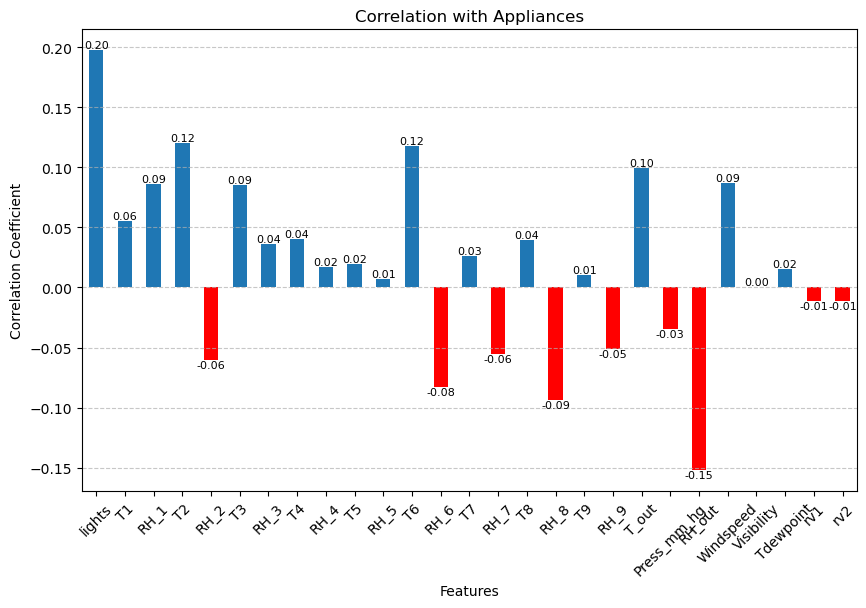

In [67]:
# Calculate summary statistics for numerical variables
summary_stats = data.drop('date', axis=1).describe()

# Print summary statistics
print("Summary Statistics for Numerical Variables:")
print(summary_stats)

# Calculate correlation coefficients
correlations = data.corr()['Appliances'].drop(['Appliances', 'date'])

# Plotting the correlations
plt.figure(figsize=(10, 6))

# Define colors based on correlation values
colors = ['red' if corr < 0 else '#1f77b4' for corr in correlations]

# Plot the bar chart with custom colors
bars = correlations.plot(kind='bar', color=colors)

# Add text annotations
for i, corr in enumerate(correlations):
    if corr < 0:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='top', fontsize=8)
    else:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='bottom', fontsize=8)


plt.title('Correlation with Appliances')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


We can see that there is a strongest correlation of 0.22 between the electricity consumption and the time of day. followed by lights (0.2), and air press (-0.15).

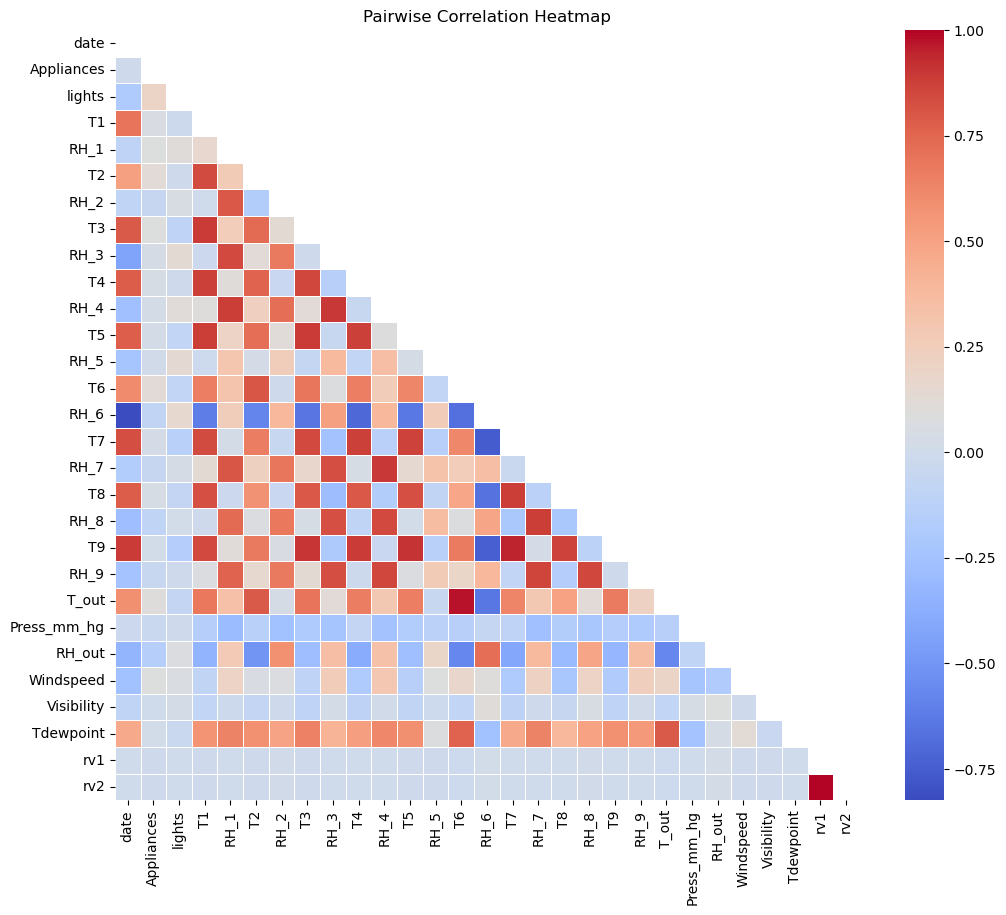

In [68]:
# Calculate pairwise correlations
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Pairwise Correlation Heatmap')
plt.show()

We can see from the heat map that none of the other features have a very significant linear link with the target (the appliance).

#### 2.5 Data Pre-processing

For both ARIMA and LSTM models, while ARIMA is generally insensitive to feature scaling, it's essential to note that LSTM models, being a type of recurrent neural network (RNN), are sensitive to feature scaling. Fortunately, since there are no missing values in our dataset, imputation is unnecessary. This streamlined approach to data preprocessing ensures a smoother modeling process.

In [69]:
from sklearn.preprocessing import MinMaxScaler

dataset = data_target.values
dataset = dataset.astype('float32')

In [70]:
# normalize the dataset for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [71]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

### 3. Implement prediction models

#### 3.1 ARIMA model implementing

- Seasonal decomposition

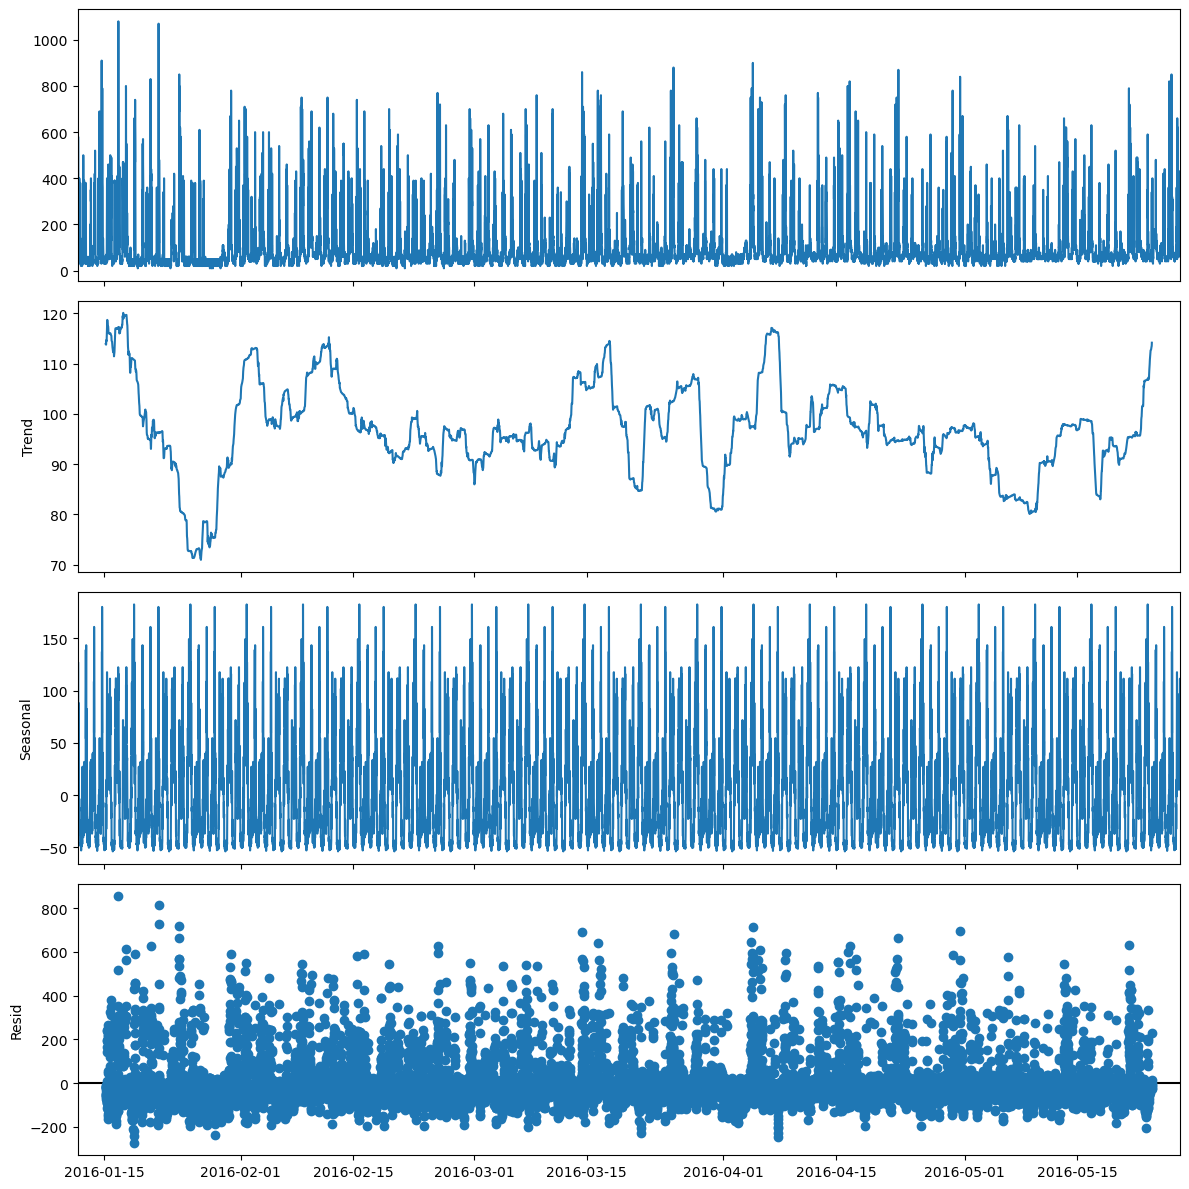

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from matplotlib import pyplot

data_arima = data[['Appliances', 'date']]
data_arima = data_arima.set_index('date')

decomp_period  = 6*24*7 # Assuming data is sampled every 10 minutes -- 1 week
result = seasonal_decompose(data_arima, period=decomp_period, model='additive')
rcParams['figure.figsize'] = 12, 12
fig = result.plot()
pyplot.show()

residual = result.resid
seasonal = result.seasonal
trend = result.trend

In [74]:
# Checking if there are any null values. 
residual.isnull().values.any()

True

We got 'True' means that we have to delete null values.

In [75]:
# dopping NaN values
residual.dropna(inplace=True)

We can see from the above that the data could be considered stationary, so ideal d should be 0.

In [76]:
print(residual.head())

date
2016-01-15 05:00:00   -15.840400
2016-01-15 05:10:00   -22.652744
2016-01-15 05:20:00   -14.733727
2016-01-15 05:30:00   -15.757380
2016-01-15 05:40:00   -16.233571
Name: resid, dtype: float64


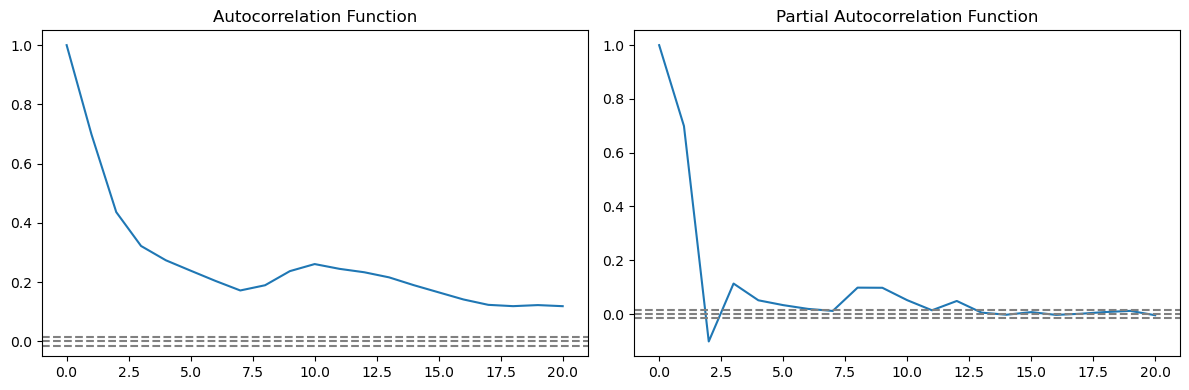

In [77]:
from statsmodels.tsa.stattools import acf, pacf

acf_cases = acf(residual, nlags = 20)
pacf_cases = pacf(residual, nlags = 20, method = 'ols')

rcParams['figure.figsize'] = 12, 4
plt.subplot(121)
plt.plot(acf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(residual)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

- ACF & PACF

(0.0, 1.2)

<Figure size 1000x400 with 0 Axes>

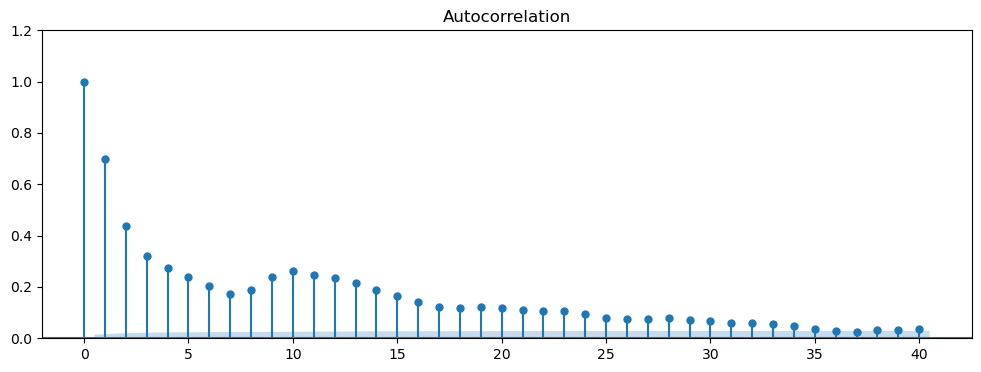

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 4))  # Set the figure size

plot_acf(residual, lags = 40)
plt.ylim(0, 1.2)  # set the range of Y axis 

(-0.2, 1.2)

<Figure size 1000x400 with 0 Axes>

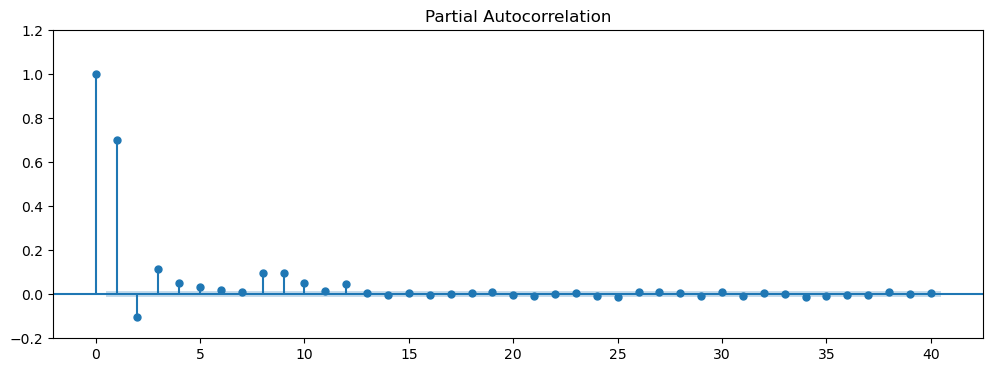

In [79]:
plt.figure(figsize=(10, 4))  # Set the figure size
plot_pacf(residual, lags = 40)
plt.ylim(-0.2, 1.2)  # set the range of Y axis 

Here we can see that lag before 2 of the lags are out of the significance limit or below the threshold so we can say that the optimal value of our p and q is 3.

#### 3.2 LSTM model implementing

In [80]:
# LSTM for international airline passengers problem with time step regression framing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [81]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)

In [82]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


#### 3.3 Machine Learning Methods


- Preparing data for machine learning methods

In [83]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# split data into training and testing sets
from sklearn.model_selection import train_test_split

x = data.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint','rv1','rv2'],axis=1)
y = data['Appliances']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


- import random forest regressor and gradient boosting regressor

In [84]:
# 2 models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

### 4. Train prediction models

#### 4.1 ARIMA model training

In [110]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model, with p, d, q as 3, 0, 3
model_AR = ARIMA(residual, order=(3, 0, 3), freq='10T')

# Fit model
results_AR = model_AR.fit() # 10 mins per capture

c:\Users\sulij\anaconda3\envs\mbd\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


#### 4.2 LSTM model training

In the experimental stage, I conducted experiments with epochs=10 and concluded that 'the value of loss tends to approach the minimum when epochs >= 3'. Therefore, for the convenience of repeated experiments, I have set epochs directly to 3 here, which can shorten the runtime.

In [86]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# from previous tests, I have already know that after ephochs 3, the loss rate will tend to be mininum. So choose 3 as our epochs.
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
15784/15784 - 20s - 1ms/step - loss: 0.0051
Epoch 2/3
15784/15784 - 18s - 1ms/step - loss: 0.0041
Epoch 3/3
15784/15784 - 18s - 1ms/step - loss: 0.0040


#### 4.3 Random Forest model training

In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
params = {'n_estimators': [100,200,500],'max_depth':[3,5,8]}

# Reduce the number of folds for cross-validation
folds = 3

# Use RandomizedSearchCV instead of GridSearchCV
model_cv_1 = RandomizedSearchCV(estimator=rf, 
                                param_distributions=params, 
                                scoring='neg_mean_absolute_error', 
                                cv=folds, 
                                return_train_score=True,
                                n_iter=10,  # Number of parameter settings sampled
                                verbose=1, 
                                n_jobs=-1)

# Fit the model
model_cv_1.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8],
                                        'n_estimators': [100, 200, 500]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

#### 4.4 Gradient Boosting Regressor training

In [88]:
# GradientBoostingRegressor
params = {'max_depth': [1,2,3]}

# cross validation
folds = 3
model_cv_2 = GridSearchCV(estimator = gb, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_2.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

### 5. Test predictin models and show results

#### 5.1 ARIMA model predictions

- Residual predictions

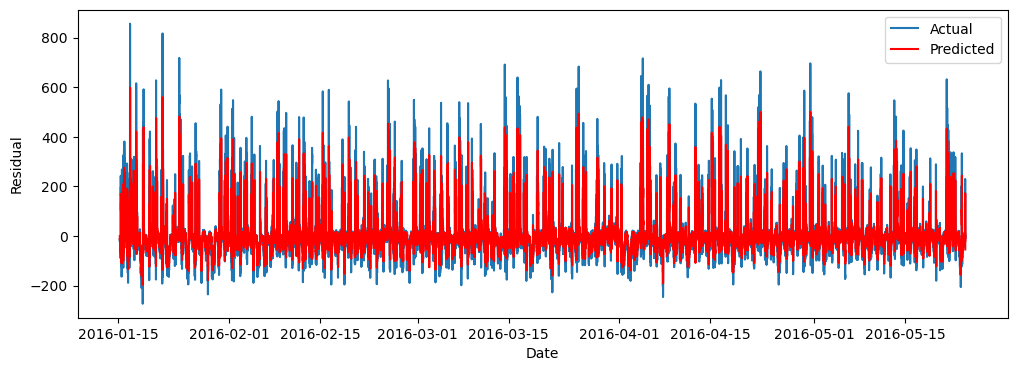

In [89]:
# ARIMA

# Draw the outcome
plt.plot(residual, label='Actual')
plt.plot(results_AR.fittedvalues, color='red', label='Predicted')
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend(loc="best")


- Final predictions

The autoregressive (AR) model relies on past observations to predict future values, so I have carefully chosed the appropriate start time and end time.

In [90]:
# We choose a later period of time to make predictions.
start_time = "2016-01-15 17:00:00"
end_time = "2016-05-27 18:00:00"
predictions = results_AR.predict(start=start_time, end=end_time, dynamic=False, freq='10T')

In [91]:
predictions

2016-01-15 17:00:00   -69.068783
2016-01-15 17:10:00   -44.970132
2016-01-15 17:20:00   -37.958415
2016-01-15 17:30:00   -59.941219
2016-01-15 17:40:00   -47.876292
                         ...    
2016-05-27 17:20:00    -0.155686
2016-05-27 17:30:00    -0.155686
2016-05-27 17:40:00    -0.155686
2016-05-27 17:50:00    -0.155686
2016-05-27 18:00:00    -0.155686
Freq: 10min, Name: predicted_mean, Length: 19159, dtype: float64

In [92]:
# Add back trend + seasonal, or otherwise the whole prediction will be definitely lower than original data
final_predictions = predictions + trend + seasonal
final_predictions.shape

(19735,)

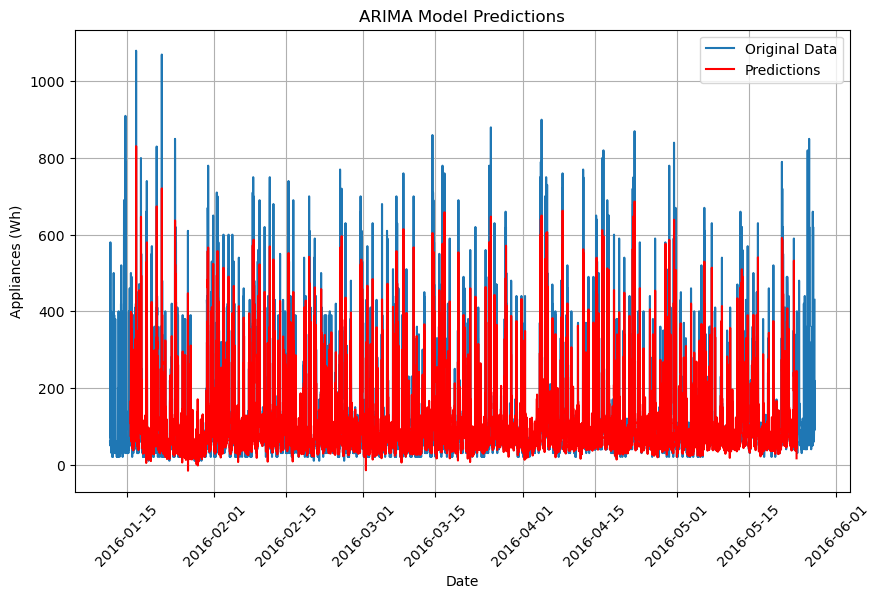

In [93]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot original data
plt.plot(data['date'], data_arima['Appliances'], label='Original Data')

# Plot predictions
plt.plot(data['date'], final_predictions, color='red', label='Predictions')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.title('ARIMA Model Predictions')

# Add legend
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines

# Show plot
plt.show()

#### 5.2 LSTM predictions

In [94]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

494/494 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


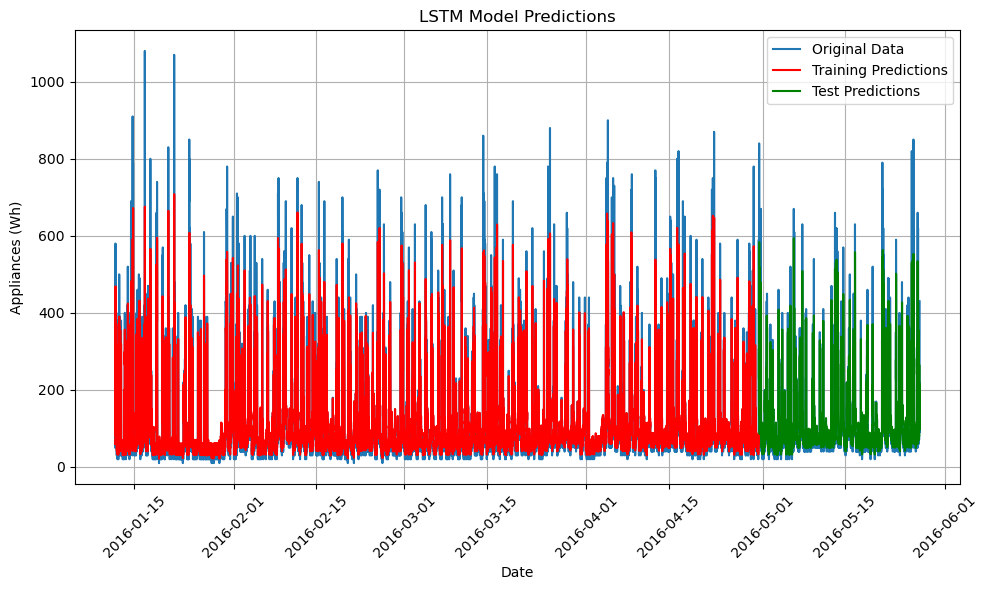

In [95]:
# Plot baseline and predictions
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['date'], data['Appliances'], color='#1f77b4',  linestyle='-', label='Original Data')  # Plot with markers
plt.plot(data['date'], trainPredictPlot, color='red',  linestyle='-', label='Training Predictions')  # Plot with markers
plt.plot(data['date'], testPredictPlot, color='green',  linestyle='-', label='Test Predictions')  # Plot with markers

plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()  # Add legend
plt.show()


#### 5.3 Random Forest predictions

In [96]:
#final RandomForestRegressor

rf = RandomForestRegressor(max_depth=8, n_estimators=500,random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500, random_state=42)

In [97]:
rf_test_pred = rf.predict(x_test)

#### 5.4 Gradient Boosting Regressor predictions 

In [98]:
#final GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=5,random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [99]:
gb_test_pred = gb.predict(x_test)

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

- ARIMA 

In [100]:
data_subset = data_arima['Appliances'][(data_arima.index >= start_time) & (data_arima.index <= end_time)]

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_ar = np.mean(np.abs(data_subset- final_predictions))
mse_ar = np.mean((data_subset- final_predictions) ** 2)
rmse_ar = np.sqrt(mse_ar)
mape_ar = np.mean(np.abs((data_subset- final_predictions) / data_subset)) * 100

print("Mean Absolute Error (MAE) for ARIMA:", mae_ar)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_ar)
print("Mean Absolute Percentage Error (MAPE) for ARIMA:", mape_ar)

Mean Absolute Error (MAE) for ARIMA: 30.430244505967522
Root Mean Squared Error (RMSE) for ARIMA: 62.33467043574461
Mean Absolute Percentage Error (MAPE) for ARIMA: 31.594001482855322


- LSTM

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Combine trainPredict and testPredict into a single dataset
combined_predictions = np.concatenate((trainPredict[:,0], testPredict[:,0]))

# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_lstm = mean_absolute_error(np.concatenate((trainY[0], testY[0])), combined_predictions)
rmse_lstm = np.sqrt(mean_squared_error(np.concatenate((trainY[0], testY[0])), combined_predictions))
mape_lstm = np.mean(np.abs((np.concatenate((trainY[0], testY[0])) - combined_predictions) / np.concatenate((trainY[0], testY[0]))) * 100)

print("Mean Absolute Error (MAE) for LSTM:", mae_lstm)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse_lstm)
print("Mean Absolute Percentage Error (MAPE) for LSTM:", mape_lstm)

Mean Absolute Error (MAE) for LSTM: 29.827355815361337
Root Mean Squared Error (RMSE) for LSTM: 65.53734108645615
Mean Absolute Percentage Error (MAPE) for LSTM: 30.699290179476716


- Random Forest

In [102]:
# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_rf = metrics.mean_absolute_error(y_test, rf_test_pred)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))
mape_rf = np.mean(np.abs((y_test - rf_test_pred) / y_test)) * 100

print("Mean Absolute Error (MAE) for RF:", mae_rf)
print("Root Mean Squared Error (RMSE) for RF:", rmse_rf)
print("Mean Absolute Percentage Error (MAPE) for RF:", mape_rf)

Mean Absolute Error (MAE) for RF: 44.99424619020264
Root Mean Squared Error (RMSE) for RF: 83.49559904823651
Mean Absolute Percentage Error (MAPE) for RF: 52.11667094759201


- Gradient Boosting

In [103]:
# Calculate MAE, RMSE, and MAPE for the combined dataset
mae_gb = metrics.mean_absolute_error(y_test, gb_test_pred)
rmse_gb=np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred))
mape_gb = np.mean(np.abs((y_test - gb_test_pred) / y_test)) * 100

print("Mean Absolute Error (MAE) for GB:", mae_gb)
print("Root Mean Squared Error (RMSE) for GB:", rmse_gb)
print("Mean Absolute Percentage Error (MAPE) for GB:", mape_gb)

Mean Absolute Error (MAE) for GB: 41.618740815093545
Root Mean Squared Error (RMSE) for GB: 78.7710393221513
Mean Absolute Percentage Error (MAPE) for GB: 46.484278532018166


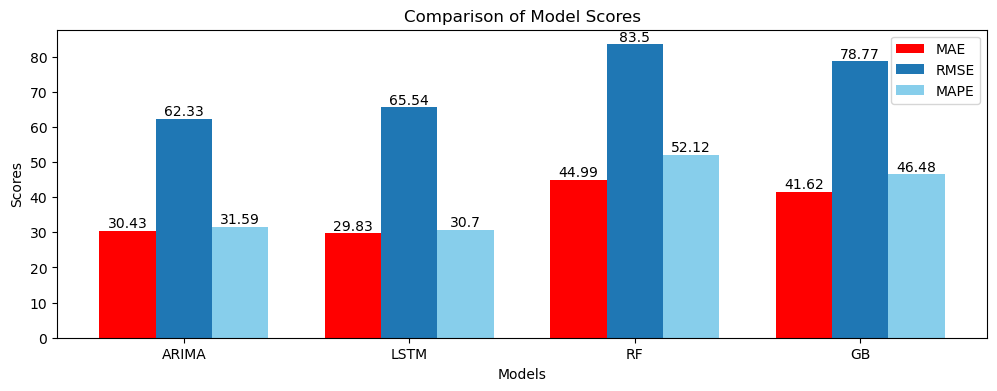

In [108]:
import numpy as np
import matplotlib.pyplot as plt

models = ['ARIMA', 'LSTM', 'RF', 'GB']

mae_scores = [mae_ar, mae_lstm, mae_rf, mae_gb]
rmse_scores = [rmse_ar, rmse_lstm, rmse_rf, rmse_gb]
mape_scores = [mape_ar, mape_lstm, mape_rf, mape_gb]

bar_width = 0.25

index = np.arange(len(models))

plt.bar(index - bar_width, mae_scores, bar_width, label='MAE', color='red')

plt.bar(index, rmse_scores, bar_width, label='RMSE', color=color)

plt.bar(index + bar_width, mape_scores, bar_width, label='MAPE', color='skyblue')

for i in range(len(models)):
    plt.text(index[i] - bar_width, mae_scores[i] + 0.01, str(round(mae_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i], rmse_scores[i] + 0.01, str(round(rmse_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i] + bar_width, mape_scores[i] + 0.01, str(round(mape_scores[i], 2)), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Scores')

plt.xticks(index, models)

plt.legend()

plt.show()

From the graph, we can see that the model scores of ARIMA and LSTM are very close, placing them in the top tier. Following closely are Gradient Boosting and Random Forest.

The flection from this is that model choosing and parameters determination is a complex process. In this assignment, given your data collected every 10 minutes over a period of over 4 months, both ARIMA and LSTM models are viable options for modeling and prediction. And since we can have prior knowledge of the time series features, ARIMA might be a suitable choice. The fact that by simple parameter selection process, it reached a relatively good performance.

Traditional machine learning methods like RF and GB can be used for this kind of problems but it's usually harder to implement compared to ARIMA and LSTM, and the result is not ideal.

### 7. Reflect on what you have learned by completing this assignment

It was my first foray into this field, and the project provided me with valuable insights into the characteristics of time series data and introduced me to relevant analytical methods.

After EDA, I identified the seasonal feature of the dataset and segmented the main feature into trend, seasonal, and residuals using the 'tsa' library for ARIMA model implementation. This step is crucial as ARIMA focuses on studying and predicting residuals. I then selected the appropriate parameters for p, q, and d by observing ACF and PACF. In the case of LSTM model, I learned the importance of data scaling. The model autonomously optimized its parameters using 'epochs', akin to the process in Random Forest and Gradient Boosting, where 'scikit-learn' searches for the best hyperparameters within specified distributions. Upon comparing the performance of various models, I realized that while all four models achieved similar outcomes, the selection of model could significantly impact prediction accuracy.

Throughout the entire process, I dedicated over 20 hours to studying relevant concepts online, reviewing provided materials, testing models, and troubleshooting issues. This endeavor deepened my understanding of time series forecasting. However, I am acutely aware that refining models for enhanced efficiency and accuracy is an ongoing journey. I view this experience as a promising starting point for my future studies.

### 8. References

https://www.kaggle.com/code/gaganmaahi224/appliances-energy-time-series-analysis#ARMA-Models
(for data preprocessing)

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
(for ARIMA model learning and parameters determination)

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
(for understanding seasonal decomposition)

https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values